# Optimization Methods: Using SciPy

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Work/IIT MADRAS/TERM 2/AI_Lab/utils')

from logging_config import get_logger
logger = get_logger("This is week 1 AI Lab")
logger.propagate = False

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,LinearConstraint,Bounds,linprog, minimize_scalar,fminbound, brent,least_squares
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

---
## Part 1: Fundamentals of Optimization

### 1.1 Linear Functions
A function f(x) is linear if it satisfies: **f(αx₁ + βx₂) = αf(x₁) + βf(x₂)**

Linear Function Verification:
f(αx₁ + βx₂) = 16.400000
αf(x₁) + βf(x₂) = 16.400000
Linearity satisfied: True

X Grid:
 [[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]



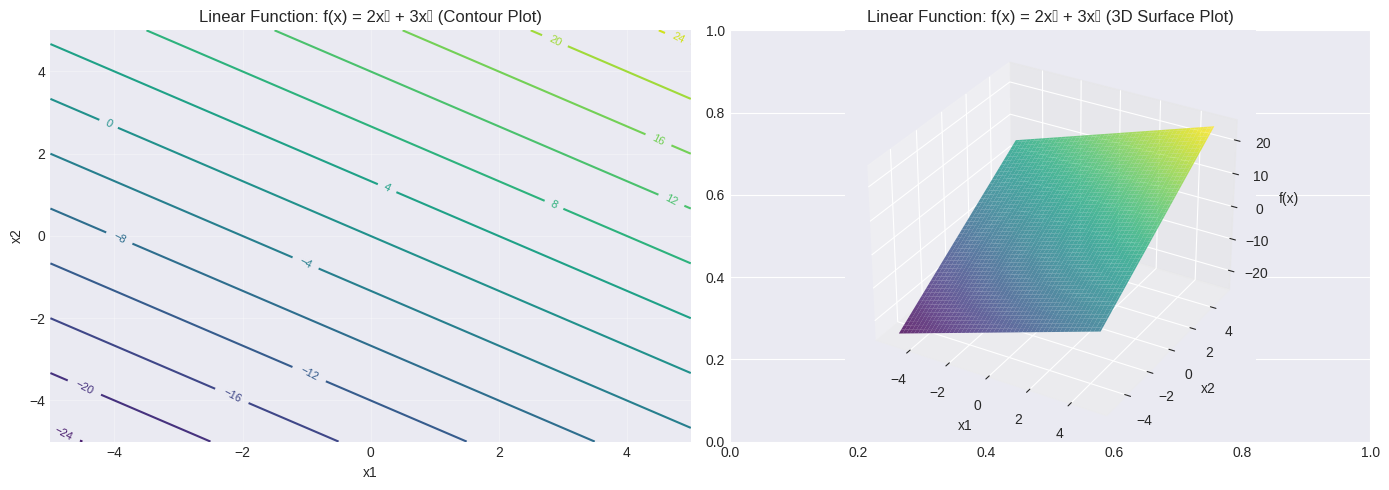

Linear functions form the basis of Linear Programming problems.


In [4]:
# Example 1.1: Linear Function
def linear_function(x,c):
    """Linear Function : f(x) = c^T*x"""
    return np.dot(c,x)

#Test linearlity property
c = np.array([2,3,1]) #Coefficient vector
x1 = np.array([1,2,3])
x2 = np.array([4,5,6])
alpha = 0.7
beta = 0.3

# Check linearity: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
lhs = linear_function(alpha*x1 + beta*x2,c)
rhs = alpha*linear_function(x1,c) + beta*(linear_function(x2,c))

print("Linear Function Verification:")
print(f"f(αx₁ + βx₂) = {lhs:.6f}")
print(f"αf(x₁) + βf(x₂) = {rhs:.6f}")
print(f"Linearity satisfied: {np.isclose(lhs, rhs)}")
print()

# Additional example: 2D linear function visualization
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
print("X Grid:\n", X)
print()
c2d = np.array([2,3])
Z = c2d[0]*X + c2d[1]*Y
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

# Contour plot
contour = ax1.contour(X,Y,Z,levels=15,cmap = 'viridis')
ax1.clabel(contour,inline=True,fontsize=8)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title('Linear Function: f(x) = 2x₁ + 3x₂ (Contour Plot)')
ax1.grid(True, alpha=0.3)

# 3D surface plot
ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_surface(X,Y,Z,cmap='viridis',alpha=0.8)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x)")
ax2.set_title('Linear Function: f(x) = 2x₁ + 3x₂ (3D Surface Plot)')

plt.tight_layout()
plt.show()

print("Linear functions form the basis of Linear Programming problems.")

---
## Part 3: Linear Programming (LP)

### 3.1 Linear Programming Formulation
**max c^T x** subject to **Ax ≤ b** and **A_eq x = b_eq**

Example 3.1: Linear Programming

Problem : Production Optimization
----------------------------------------
Maximize profit: 3x₁ + 2x₂
Subject to:
2x₁ + x₂ ≤ 100  (Resource 1)
x₁ + x₂ ≤ 80    (Resource 2)
x₁, x₂ ≥ 0

Solution (SciPy - linprog):
Optimal point x1 =  20.00, x₂ = 60.00 
Optimal value: 180.00

Constraint verification:
 2x₁ + x₂ = 100.00<=100✓
 x₁ + x₂ = 80.00<=80✓
 x1 ≥ 0 = 20.00>=0✓
 x2 ≥ 0 = 60.00>=0✓


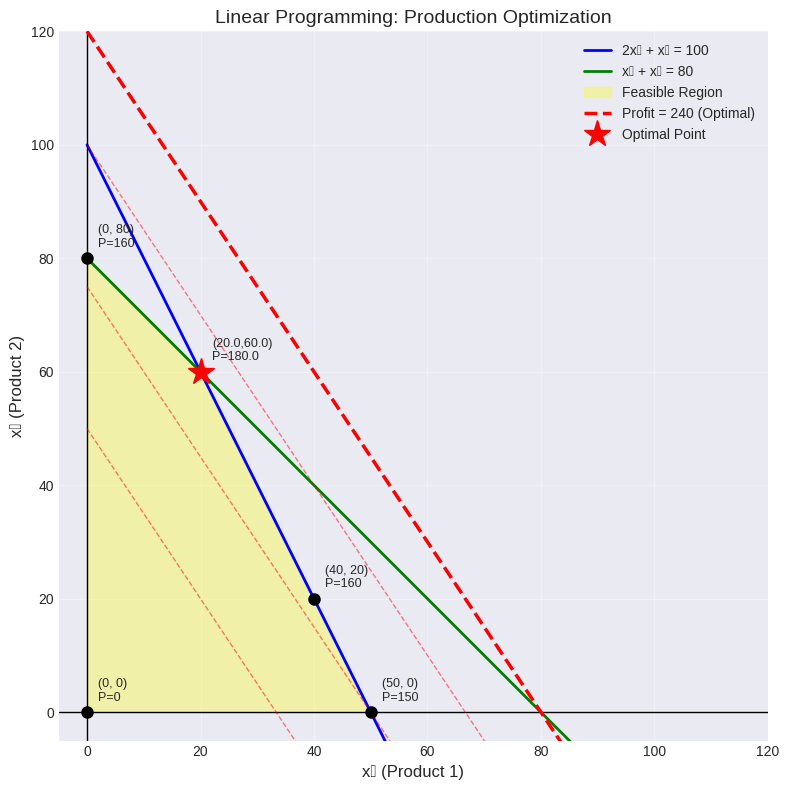

In [5]:
# Example 3.1: Linear Programming
print("="*60)
print("Example 3.1: Linear Programming")
print("="*60)
print()

# Problem: A company produces two products
# Maximize profit: 3x₁ + 2x₂
# Subject to:
# 2x₁ + x₂ ≤ 100  (Resource 1)
# x₁ + x₂ ≤ 80    (Resource 2)
# x₁, x₂ ≥ 0

print("Problem : Production Optimization")
print("-"*40)
print("Maximize profit: 3x₁ + 2x₂")
print("Subject to:")
print("2x₁ + x₂ ≤ 100  (Resource 1)")
print("x₁ + x₂ ≤ 80    (Resource 2)")
print("x₁, x₂ ≥ 0")
print()

#coefficeints
c = np.array([3,2]) # Objective coefficients (we'll minimize -c for maximization)
A_ub = np.array([[2,1] , [1,1]])  # Inequality constraint matrix
b_ub = np.array([100,80]) # Inequality constraint bounds
x_bounds =[(0,None),(0,None)]

# Solve using linprog (minimizes c^T x, so we negate c)
result_lp = linprog(-c,A_ub,b_ub,bounds = x_bounds,method='highs')

# print("Solution (SciPy - linprog):",result_lp)
# print()
print("Solution (SciPy - linprog):")
print(f"Optimal point x1 =  {result_lp.x[0]:.2f}, x₂ = {result_lp.x[1]:.2f} ")
print(f"Optimal value: {-result_lp.fun:.2f}")
print()

# Verify constraints
print("Constraint verification:")
print(f" 2x₁ + x₂ = {result_lp.x[0]*2 + result_lp.x[1]*1:.2f}<=100✓")
print(f" x₁ + x₂ = {result_lp.x[0]*1 + result_lp.x[1]*1:.2f}<=80✓")
print(f" x1 ≥ 0 = {result_lp.x[0]:.2f}>=0✓")
print(f" x2 ≥ 0 = {result_lp.x[1]:.2f}>=0✓")

# Visualization
x1= np.linspace(0,120,500)

# Constrant lines
x2_constraint1 = 100 - 2*x1   # 2x₁ + x₂ = 100
x2_constraint2 = 80-1*x1 # x₁ + x₂ = 80

# Objective function lines (isoprofit lines)
profit_levels = [100, 150, 200, 240]

fig,ax = plt.subplots(figsize = (10,8))

# Plot constraint
ax.plot(x1,x2_constraint1,'b-',linewidth = 2,label = '2x₁ + x₂ = 100' )
ax.plot(x1,x2_constraint2,'g-',linewidth = 2,label = 'x₁ + x₂ = 80' )
ax.axhline(0,color='k',linewidth=1)
ax.axvline(0,color='k',linewidth=1)

# Fill feasible regions
x1_fill = np.linspace(0,80,100)
x2_upper = np.minimum(100-2*x1_fill,80-x1_fill)
x2_upper = np.maximum(x2_upper,0)
ax.fill_between(x1_fill,0,x2_upper,alpha = 0.3, color='yellow', label='Feasible Region')

# Plot isoprofit lines
for profit in profit_levels:
    x2_profit = (profit - 3*x1)/2
    if profit == 240:
        ax.plot(x1,x2_profit,'r--',linewidth = 2.5, label=f'Profit = {profit} (Optimal)')
    else:
        ax.plot(x1,x2_profit,'r--',linewidth = 1,alpha = 0.5)

# Plot optimal point
ax.plot(result_lp.x[0],result_lp.x[1],'r*',markersize=20,label='Optimal Point')
ax.text(result_lp.x[0]+2,result_lp.x[1]+2,f'({result_lp.x[0]},{result_lp.x[1]})\nP={-result_lp.fun}', fontsize=9)

# Plot Corner Points
corners = [(0,0),(0,80),(40,20),(50,0)]
for corner in corners:
    profit = 3*corner[0] + 2*corner[1]
    ax.plot(corner[0],corner[1],'ko',markersize=8)
    ax.text(corner[0]+2,corner[1]+2, f'({corner[0]}, {corner[1]})\nP={profit}', fontsize=9)

ax.set_xlim(-5, 120)
ax.set_ylim(-5, 120)
ax.set_xlabel('x₁ (Product 1)', fontsize=12)
ax.set_ylabel('x₂ (Product 2)', fontsize=12)
ax.set_title('Linear Programming: Production Optimization', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [20]:
# Example 3.2: Linear Programming
print("="*60)
print("Example 3.2: Linear Programming")
print("="*60)
print()

# Problem: A company produces two products
# minimize  profit: -4x_0 + 4x_1
# Subject to:
# -3x_0 + x_1 ≤ 6  (Resource 1)
# -x_0 + x_1 >= -4    (Resource 2)
#  x₁,  ≥ -3

print("Problem: A company produces two products")
print("-"*40)
print("minimize  profit: -x_0 + 4x_1")
print("Subject to:")
print("-3x_0 + x_1 ≤ 6  (Resource 1)")
print("-x_0 + x_1 >= -4    (Resource 2)") # we need to take negative both side
print(" x₁,  ≥ -3")

#coefficeints
c = np.array([-1,4]) # Objective coefficients
A_ub = np.array([[-3,1],[1,-1]  ]) # Inequality constraint matrix
b_ub = np.array([6,4]) # Inequality constraint bounds
bounds = [(None,None),(-3,None)]

# Solve using scipy.optimize.linprog
opt_result = linprog(c=c,A_ub = A_ub,b_ub=b_ub,bounds=bounds,method='highs')
print("Solution (SciPy - linprog):")
print(f"Optimal point x_0 =  {result_lp.x[0]:.2f}, x_1 = {result_lp.x[1]:.2f} ")
print(f"Optimal value: {result_lp.fun:.2f}")
print()


Example 3.2: Linear Programming

Problem: A company produces two products
----------------------------------------
minimize  profit: -x_0 + 4x_1
Subject to:
-3x_0 + x_1 ≤ 6  (Resource 1)
-x_0 + x_1 >= -4    (Resource 2)
 x₁,  ≥ -3
Solution (SciPy - linprog):
Optimal point x_0 =  20.00, x_1 = 60.00 
Optimal value: -180.00



In [21]:
#help(linprog)

---
## Part 6: Gradient Descent Methods

### 6.1 Batch Gradient Descent

In [6]:
# Example 6.1: Gradient Descent Methods
print("="*60)
print("Example 6.1: Gradient Descent Methods")
print("="*60)
print()

# Simple quadratic function for demonstration
def quadratic_2d(x):
    """f(x) =  (x₁ - 2)² + (x₂ - 3)²"""
    return(x[0]-2)**2 + (x[1]-3)**2

Example 6.1: Gradient Descent Methods



In [ ]:
#help(plt.contour)

## Part 7: Summary and Key Takeaways

### Summary of Optimization Methods

In [12]:
print("="*70)
print("SUMMARY: OPTIMIZATION METHODS")
print("="*70)
print()

summary = """
1. FUNDAMENTALS
  - Numpy methods : np.dot, np.linspace
   - Linear functions: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
   - Convex functions: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)
   - Nonlinear functions: Functions that don't satisfy linearity

8. SCIPY TOOLS
   - scipy.optimize.minimize: General-purpose minimizer
   - scipy.optimize.linprog: Linear programming
   - scipy.optimize.minimize_scalar: Single-variable optimization
   - scipy.optimize.least_squares: Nonlinear least squares
"""

print(summary)
print("="*70)

SUMMARY: OPTIMIZATION METHODS


1. FUNDAMENTALS
  - Numpy methods : np.dot, np.linspace
   - Linear functions: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
   - Convex functions: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)
   - Nonlinear functions: Functions that don't satisfy linearity

8. SCIPY TOOLS
   - scipy.optimize.minimize: General-purpose minimizer
   - scipy.optimize.linprog: Linear programming
   - scipy.optimize.minimize_scalar: Single-variable optimization
   - scipy.optimize.least_squares: Nonlinear least squares



---
## References and Further Reading